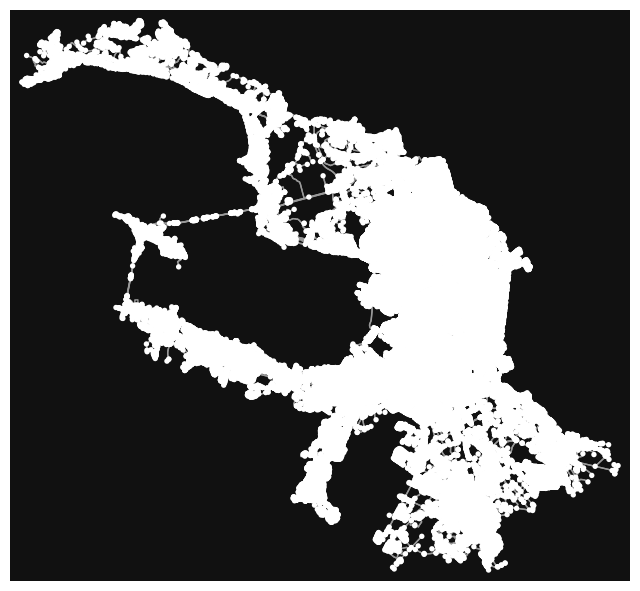

In [2]:
# Граф с дорогами и перекрестками
import osmnx as ox
import matplotlib.pyplot as plt

graph = ox.graph_from_place('Saint Petersburg, Russia', network_type='all_private') # граф всех дорог и перекрестков

# ox.save_graph_geopackage(graph, filepath='/path/roads.gpkg') надо подумать как сохранить чтобы отобразить в qgis

ox.plot_graph(graph)
plt.show()

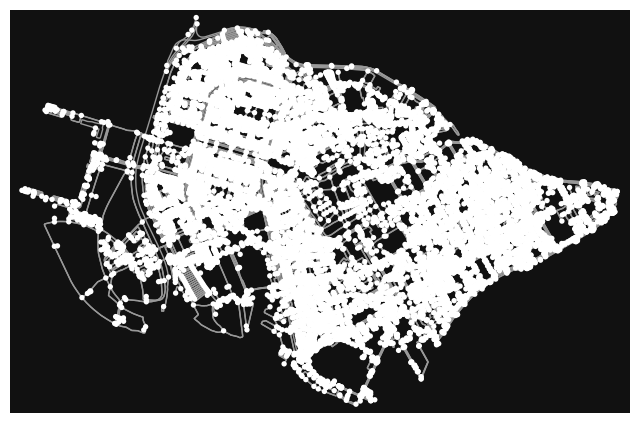

In [2]:
# Ниже недобольшая область того как это выглядит
# Граф с дорогами и перекрестками
graph = ox.graph_from_place('Vasileostrovsky District, Saint Petersburg, Russia', network_type='all_private')

ox.plot_graph(graph)
plt.show()

/tmp/ipykernel_12253/3100230930.py:7: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place('Vasileostrovsky District, Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий
/tmp/ipykernel_12253/3100230930.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_centroids = buildings.centroid # вычисляем центры масс зданий


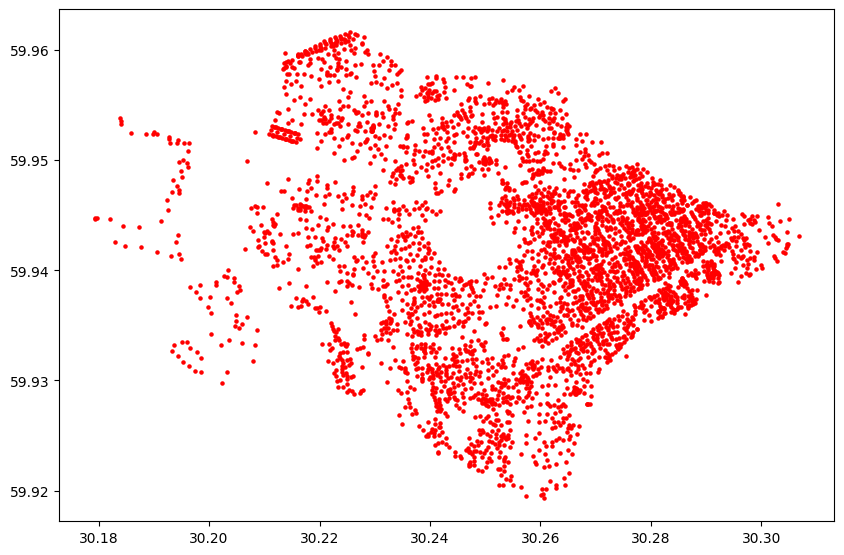

In [3]:
# Ниже недобольшая область того как это выглядит
# Граф с центрами масс зданий
import geopandas as gpd

buildings = ox.geometries_from_place('Vasileostrovsky District, Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий

building_centroids = buildings.centroid # вычисляем центры масс зданий

gdf = gpd.GeoDataFrame(building_centroids, columns=['geometry'], crs=buildings.crs) # GeoDataFrame с центрами масс зданий

fig, ax = plt.subplots(figsize=(10,10))
# buildings.plot(ax=ax, facecolor='blue')
gdf.plot(ax=ax, color='red', markersize=5)

plt.show()

Нужно подумать как мы можем объединить эти графы, если искомый граф - это кратчайшее расстояние от центров зданий до графа дорог 

In [2]:
# Граф с центрами масс зданий
# Видимо из-за большого кол-ва данных все ломается
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

buildings = ox.geometries_from_place('Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий

building_centroids = buildings.centroid # вычисляем центры масс зданий

gdf = gpd.GeoDataFrame(building_centroids, columns=['geometry'], crs=buildings.crs) # GeoDataFrame с центрами масс зданий

# ox.save_graph_geopackage(graph, filepath='/path/roads.gpkg') надо подумать как сохранить чтобы отобразить в qgis

fig, ax = plt.subplots(figsize=(10,10))
# buildings.plot(ax=ax, facecolor='blue')
gdf.plot(ax=ax, color='red', markersize=5)

plt.show()

/tmp/ipykernel_11936/1040557291.py:6: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place('Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий


: 

### Второй способ

Еще один способ получить полные слои для города - использовать эти библиотеки https://github.com/nikita03565/city-road-network https://github.com/nikita03565/crn-examples и с помощью запуска ноутбука в колабе можно получить файлы ниже. Из преимуществ - быстрая обработка. Из недостатков - данные с множеством лишних узлов и прямых (поскольку через osm подгружаются). 

In [13]:
import pandas as pd

edgelist = pd.read_csv('/data/spb/edgelist_upd.csv')
poi = pd.read_csv('/data/spb/poi_upd.csv')
nodelist = pd.read_csv('/data/spb/nodelist_upd.csv')

poi.head()

/tmp/ipykernel_17158/2327997393.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  edgelist = pd.read_csv('/home/nermakovaa/ermak/semester_3/Plugin/data/spb/edgelist_upd.csv')


,Unnamed: 0,element_type,osmid,geometry,name,amenity,landuse,shop,zone
0,0,node,253283769,POINT (30.319641 59.8236932),Газпромнефть,fuel,NaN,NaN,84.0
1,1,node,291553157,POINT (30.3132049 59.9153967),Контакт Бар,bar,NaN,NaN,45.0
2,2,node,305809296,POINT (30.2437469 59.6820773),Газпромнефть,fuel,NaN,NaN,10.0
3,3,node,309764205,POINT (30.4581999 59.9155203),Радуга,pharmacy,NaN,NaN,29.0
4,4,node,311101154,POINT (30.2880157 59.9248514),У театра,pharmacy,NaN,NaN,43.0


In [14]:
edgelist.head()

,Unnamed: 0,start_node,end_node,osmid,maxspeed,lanes,highway,surface,oneway,geometry,name,smoothness,living_street,service,length (m),length (km),capacity (veh/h),maxspeed (km/h),flow_time (h),flow_time (s)
0,0,219808,2327840,33997807,60,2,primary_link,asphalt,False,"LINESTRING (30.3314215 59.895094, 30.3311238 5...",NaN,NaN,NaN,NaN,25.051,0.025051,1800,60,0.000418,1.50306
1,1,219808,389449562,201380605,60,3,primary,asphalt,True,"LINESTRING (30.3314215 59.895094, 30.3318177 5...",Лиговский проспект,NaN,NaN,NaN,31.209,0.031209,4000,60,0.000520,1.87254
2,2,219811,1832085962,33997784,60,1,primary_link,asphalt,False,"LINESTRING (30.3374752 59.8993013, 30.3379512 ...",NaN,NaN,NaN,NaN,29.067,0.029067,1800,60,0.000484,1.74402
3,3,219811,1465050831,"[1123339577, 178581714]",60,3,primary,asphalt,True,"LINESTRING (30.3374752 59.8993013, 30.3332847 ...",Лиговский проспект,NaN,NaN,NaN,394.654,0.394654,4000,60,0.006578,23.67924
4,4,219812,249890545,4459876,60,2,primary,asphalt,True,"LINESTRING (30.3395524 59.9017314, 30.3398299 ...",Воздухоплавательная улица,very_good,NaN,NaN,33.233,0.033233,3600,60,0.000554,1.99398


В результате получаем геометрию центров зданий - poi, их название. Геометрию перекрестков и тупиков/входов в здания - nodelist. Геометрию дорог с названием типа дороги и улицы.

Из центров зданий можем найти кратчайшие прямые до ближайших дорог с помощью QGIS, предварительно загрузив слои через текст с разделителями и выбрав формат геометрии (линии/точки). Далее - Инструменты анализа -> Вектор - Анализ -> Кратчайшие линии между объектами. После можем сохранить полученные линии.

In [15]:
path = pd.read_csv('/data/spb/path.csv')

path.iloc[:6, :14]

,field_1,element_type,osmid,name,amenity,landuse,shop,zone,field_1_2,start_node,end_node,osmid_2,maxspeed,lanes
0,0,node,253283769,Газпромнефть,fuel,NaN,NaN,84.0,9151,1297245337,253283799,832630753,60,2
1,0,node,253283769,Газпромнефть,fuel,NaN,NaN,84.0,3240,253283799,1297245337,832630753,60,2
2,1,node,291553157,Контакт Бар,bar,NaN,NaN,45.0,1370,21991393,21991392,137007079,60,2
3,2,node,305809296,Газпромнефть,fuel,NaN,NaN,10.0,6768,916023599,916023528,761075965,90,3
4,3,node,309764205,Радуга,pharmacy,NaN,NaN,29.0,25216,10242771155,10242771189,1119902987,60,2
5,4,node,311101154,У театра,pharmacy,NaN,NaN,43.0,19027,4112024620,4112024596,409292294,60,3


In [16]:
path.iloc[:6, 14:]

,highway,surface,oneway,name_2,smoothness,living_street,service,length (m),length (km),capacity (veh/h),maxspeed (km/h),flow_time (h),flow_time (s),distance
0,unclassified,asphalt,ложь,Пулковское шоссе,NaN,NaN,NaN,357.398,0.357398,1800,60,0.005957,21.44388,0.000498
1,unclassified,asphalt,ложь,Пулковское шоссе,NaN,NaN,NaN,357.398,0.357398,1800,60,0.005957,21.44388,0.000498
2,residential,asphalt,истина,2-я Красноармейская улица,NaN,NaN,NaN,227.843,0.227843,3600,60,0.003797,13.67058,0.000114
3,trunk,asphalt,истина,Киевское шоссе,NaN,NaN,NaN,611.133,0.611133,4000,90,0.006790,24.44532,0.000793
4,tertiary,asphalt,истина,Искровский проспект,NaN,NaN,NaN,156.717,0.156717,3600,60,0.002612,9.40302,0.000379
5,secondary,asphalt,истина,улица Декабристов,NaN,NaN,NaN,259.291,0.259291,4000,60,0.004322,15.55746,0.000101


Вид всех слоев.

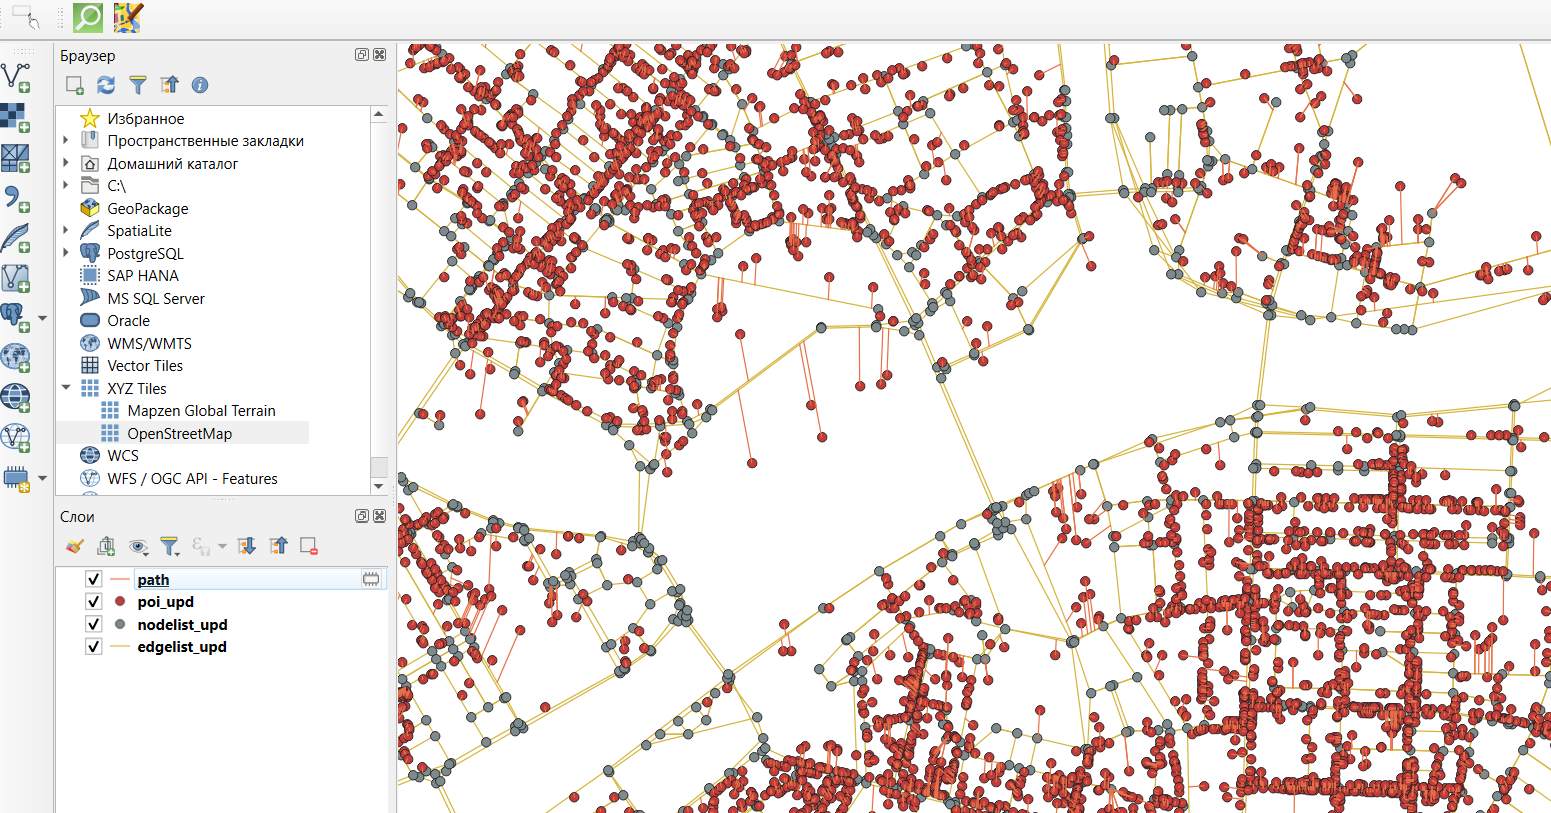

Думаю искомый граф должен состоять из узлов nodelist (перекрестки), poi (центры зданий), дуг path (кратчайшие линии) и edgelist (дороги). Нам могут подойти столбцы с геометрией из nodelist, poi, edgelist; название здания из poi, название типа дороги и улицы из edgelist; и необходимо вытащить геометрию из path + название здания из которого линия проводилась. 